170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 75ms/step - accuracy: 0.3327 - loss: 1.8040 - val_accuracy: 0.5300 - val_loss: 1.3147
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.5357 - loss: 1.2818 - val_accuracy: 0.5936 - val_loss: 1.1641
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 63ms/step - accuracy: 0.6217 - loss: 1.0861 - val_accuracy: 0.6370 - val_loss: 1.0165
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - accuracy: 0.6603 - loss: 0.9652 - val_accuracy: 0.6728 - val_loss: 0.9416
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 63ms/step - accuracy: 0.6968 - loss: 0.8671 - val_accuracy: 0.6720 - val_loss: 0.9508
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - accuracy: 0.7221 - loss: 0.7846 - val_accuracy: 0.7065 - val_loss: 0.8423
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 63ms/step - accuracy: 0.7414 - loss: 0.7292 - val_accuracy: 0.7114 - val_loss: 0.8246
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.7653 - loss: 0.6599 - 

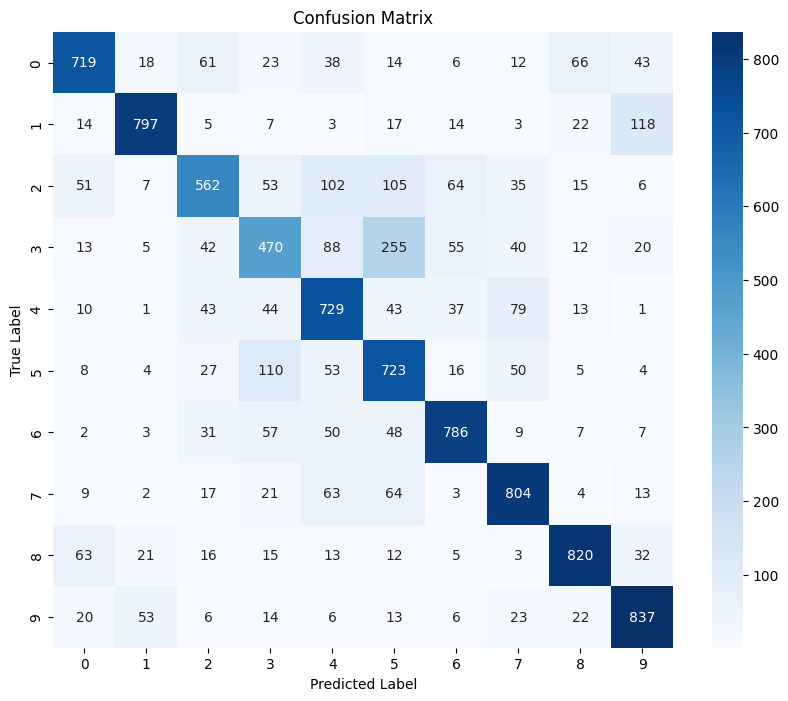


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1000
           1       0.87      0.80      0.83      1000
           2       0.69      0.56      0.62      1000
           3       0.58      0.47      0.52      1000
           4       0.64      0.73      0.68      1000
           5       0.56      0.72      0.63      1000
           6       0.79      0.79      0.79      1000
           7       0.76      0.80      0.78      1000
           8       0.83      0.82      0.83      1000
           9       0.77      0.84      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



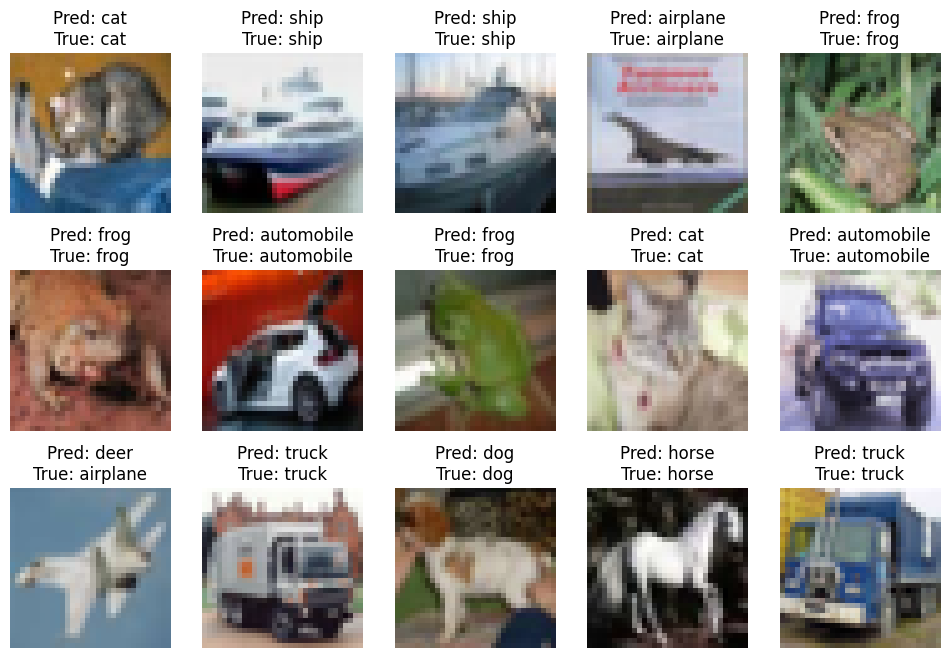

Image Classification Model Architecture:


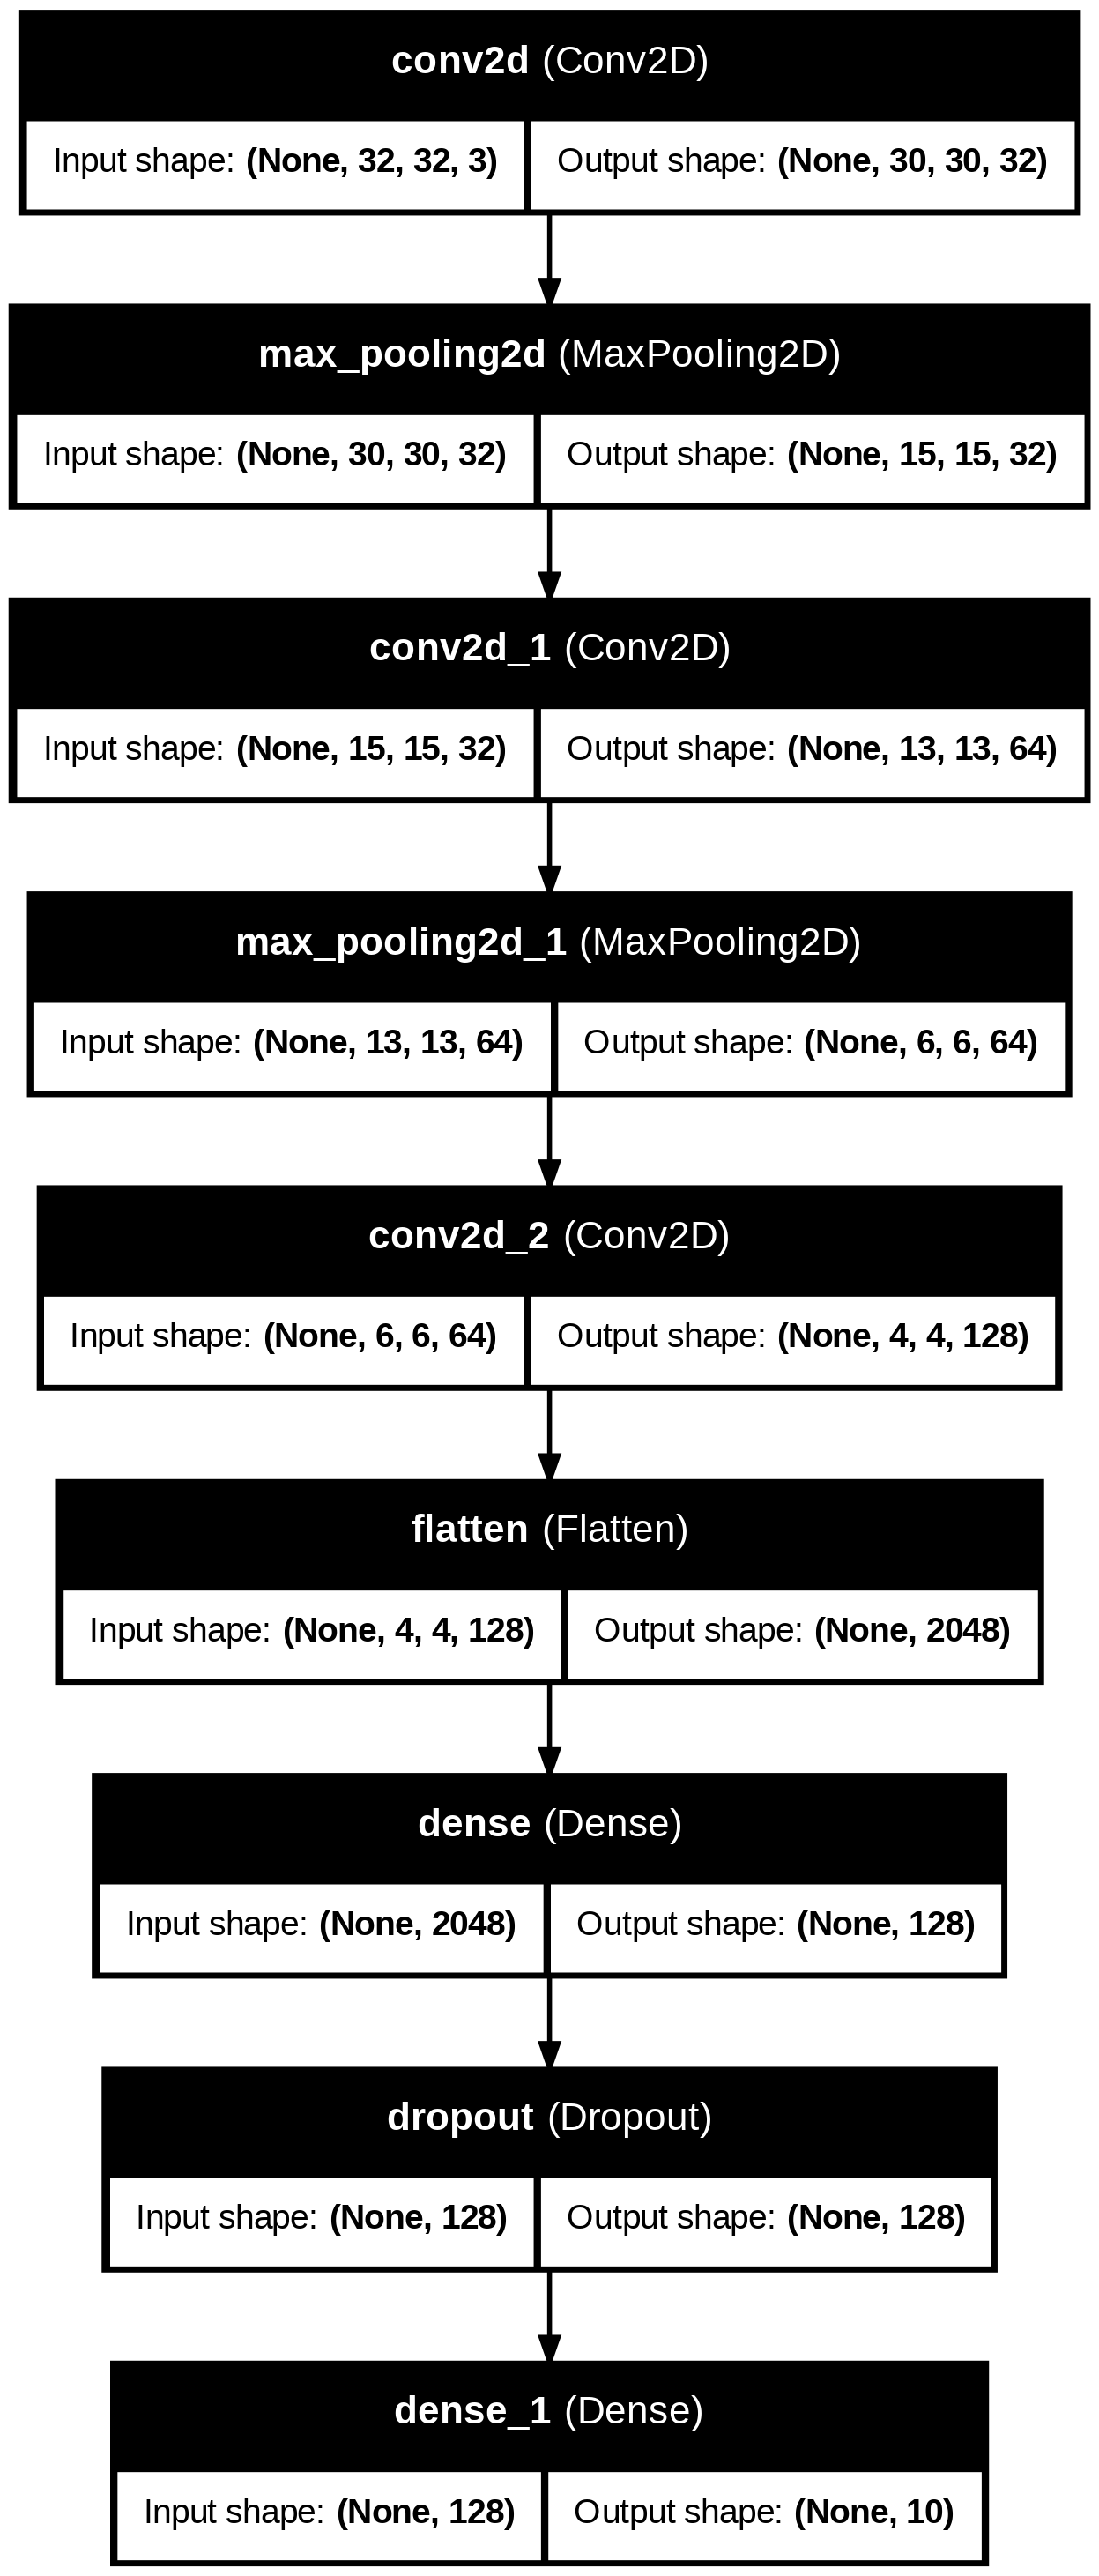


Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,070,432 (4.08 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 713,622 (2.72 MB)

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import datetime
from tensorflow.keras.callbacks import TensorBoard

# Initialize TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[tensorboard_callback])

# Evaluate model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# Display some sample predictions
fig, axes = plt.subplots(3, 5, figsize=(12, 8))
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i])
    ax.set_title(f"Pred: {class_names[y_pred_classes[i]]}\nTrue: {class_names[y_test[i][0]]}")
    ax.axis('off')
plt.show()

# Log model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='image_classification_model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
print("Image Classification Model Architecture:")
display(Image('image_classification_model.png'))

# Print model summary
print("\nModel Summary:")
model.summary()
